In [3]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def load_images(source_dir):
    imgs = []
    
    for (dirpath, dirnames, filenames) in os.walk(source_dir):
        imgs.extend([filename for filename in filenames if filename.endswith('.jpg')])
        break
    
    image_list = [cv2.imread(os.path.join(source_dir, img), 1) for img in imgs]

    return image_list

In [5]:
img_list = load_images('../input_image/parrington')

In [60]:
img = img_list[0]
dst = cv2.cornerHarris(img[:,:,0],2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [63]:
def harris_corner(img, threshold=0, k=0.04, kernel=3):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    height, width, _ = img.shape
    Ix = cv2.Sobel(gray, -1, 1, 0)
    Iy = cv2.Sobel(gray, -1, 0, 1)

    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix*Iy
    
    corner_mask = np.zeros(shape=(height, width), dtype=np.uint16)
    offset = kernel//2
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            # if window function is binary
            Sxx = Ixx[x-offset:x+offset][y-offset:y+offset].sum()
            Syy = Iyy[x-offset:x+offset][y-offset:y+offset].sum()
            Sxy = Ixy[x-offset:x+offset][y-offset:y+offset].sum()
            
            # M = [[Sxx, Sxy],
            #      [Sxy, Syy]]
            det_M = Sxx*Syy - Sxy**2
            trace_M = Sxx + Syy
            
            R = det_M - k*trace_M**2
            
            corner_mask[y][x]= R
            
    return corner_mask
    

[[False False False ..., False False False]
 [False  True False ...,  True  True False]
 [False  True  True ...,  True  True False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]


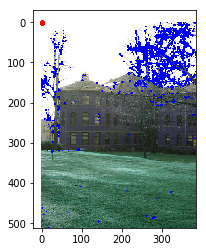

In [71]:
cm = harris_corner(img_list[0], 10000)
#c[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img_list[0])
for i in [cm>0.01*cm.max()]:
    print(i)
    plt.scatter(x=i[0], y=i[1], c='r', s=10)

plt.show()

In [72]:
[cm>0.01*cm.max()]

[array([[False, False, False, ..., False, False, False],
        [False,  True, False, ...,  True,  True, False],
        [False,  True,  True, ...,  True,  True, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]], dtype=bool)]

a